# Vector Space Model

In [5]:
import numpy
import pandas
from matplotlib import pyplot
from test_data import data as word_embeddings

## Vectorization

### Word by Word

Count co-appearance of the words in the given distance.

ex)
for distance k = 2,

- I like simple **data**
- I prefer simple raw **data**

| | simple | raw | like | I |
| -- | -- | -- | -- | -- |
| data | 2 | 1 | 1 | 0 |

### Word by Document

Count appearance of the words in a document.

ex)

| | Entertainment | Economy | Machine Learning |
| -- | -- | -- | -- |
| data | 500 | 6620 | 9320 |
| film | 7000 | 4000 | 1000 |

In [6]:
word_embeddings["king"][:4]

array([0.12597656, 0.02978516, 0.00860596, 0.13964844], dtype=float32)

## Vector Similarity

Euclidean Distance might not fit very well when comparing vectors.

### Cosine Similarity

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

In [7]:
def get_cosine_similarity(a, b, /):
    return a.dot(b) / (numpy.linalg.norm(a) * numpy.linalg.norm(b))

In [8]:
# feel free to try different words
king = word_embeddings["king"]
queen = word_embeddings["queen"]

get_cosine_similarity(king, queen)

0.6510956

## Word Embedding

You can find the relation between words by comparing the embedding vector.

In [9]:
def get_country(city1, country1, city2, embeddings):
    # city1 to country1 as city2 to (return)
    city1_vector, country1_vector, city2_vector = embeddings[city1], embeddings[country1], embeddings[city2]
    country2_vector = city2_vector + country1_vector - city1_vector

    nearest_country = ""
    max_similarity = -1
    for word, word_vector in embeddings.items():
        if word not in {city1, country1, city2}:
            if (similarity := get_cosine_similarity(word_vector, country2_vector)) > max_similarity:
                nearest_country, max_similarity = word, similarity

    return nearest_country, max_similarity

In [10]:
city1, country1, city2 = "Athens", "Greece", "Cairo"
country2, similarity = get_country(city1, country1, city2, word_embeddings)
f"{city1} to {country1} as {city2} to {country2} with {similarity} similarity"

'Athens to Greece as Cairo to Egypt with 0.7626820802688599 similarity'

## Reducing Demension

it is impossible to visualize the word embeddings in such high dimensional spaces. Let us project the vectors into a smaller demension space.

### Principal Component Analysis (PCA)

In [35]:
def compute_pca(vector, target_dimension=2):
    # mean center the vector(division by standard vediation is optional?)
    centered_vector = (vector - vector.mean(axis=0)) / vector.std(axis=0)
    #     centered_vector = (vector - vector.mean(axis=0))

    # get covariance matrix
    covariance = numpy.cov(centered_vector.T)

    # use eigh() only when you know the matrix is symmetric. If not, call eig()
    eigenvalues, eigenvectors = numpy.linalg.eigh(covariance)

    # sort the eigenvalues and eigenvectors in descreasing order
    decreasing_indices = numpy.argsort(eigenvalues)[::-1]
    decreasing_eigenvalues = eigenvalues[decreasing_indices]
    # beware that we're sorting each row, not the rows
    decreasing_eigenvectors = eigenvectors[:, decreasing_indices]

    eigenvectors_subset = decreasing_eigenvectors[:, 0:target_dimension]

    return eigenvectors_subset.T.dot(centered_vector.T).T

In [36]:
# Testing your function
numpy.random.seed(1)
X = numpy.random.rand(3, 10)
X_reduced = compute_pca(X, target_dimension=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
X_reduced

Your original matrix was (3, 10) and it became:


array([[ 1.80913582,  2.31550476],
       [ 1.76788619, -2.3333748 ],
       [-3.577022  ,  0.01787004]])

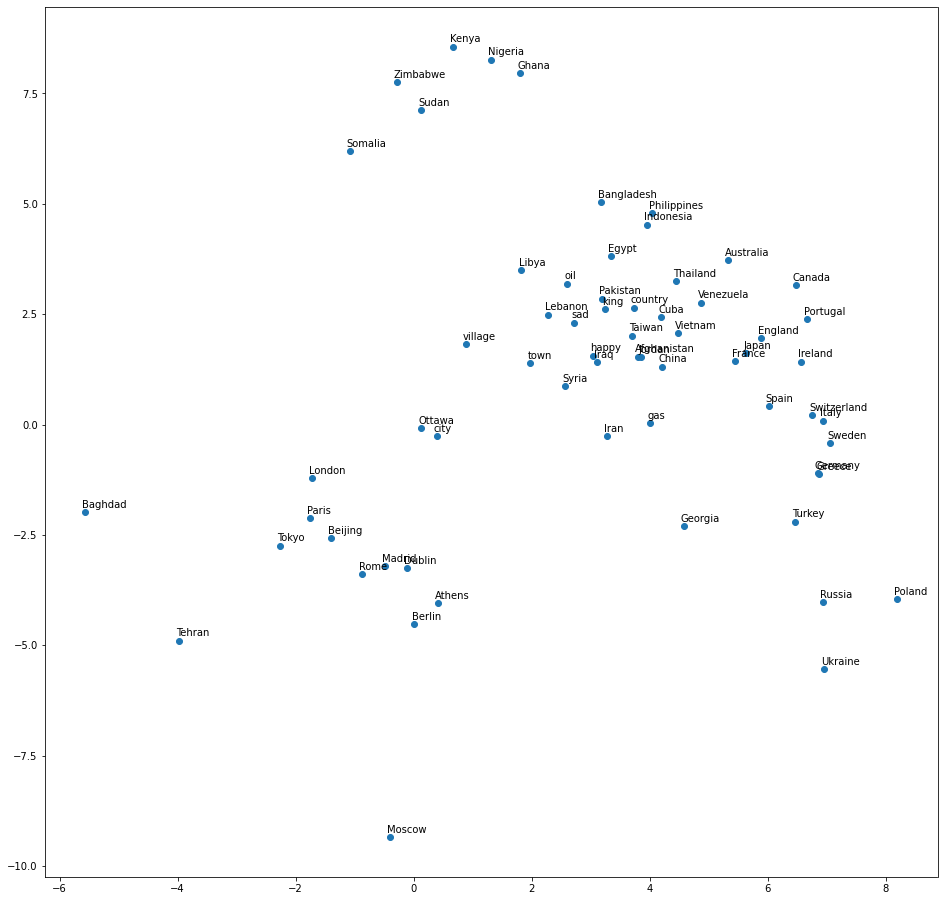

In [51]:
show_count = 64
words = list(word_embeddings.keys())
vectors = numpy.array([word_embeddings[word] for word in words])
reduced_vectors = compute_pca(vectors, target_dimension=2)[:show_count]

pyplot.figure(figsize=(16, 16))
pyplot.scatter(
    x=reduced_vectors[:, 0],
    y=reduced_vectors[:, 1],
)
for i, word in enumerate(words[:show_count]):
    pyplot.annotate(word, xy=(reduced_vectors[i, 0] - 0.05, reduced_vectors[i, 1] + 0.1))

pyplot.show()
# fig.show()


# data_frame = pandas.DataFrame(columns=["key", "x", "y"])
# reduced_word_embeddings = compute_pca(word_embeddings, target_dimension=2)
# for i, vector in enumerate(reduced_word_embeddings.items()):
#     data_frame.append(